In [56]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

In [204]:
# def gtf(cords,l,m,a)->np.ndarray:
#     x=cords[0,:]
#     y=cords[1,:]
#     r2=x**2+y**2
#     val=x**l*y**m*np.exp(-a*r2)
#     return val

# def loss_fn(coes):
#     c1,c2,c3=coes
#     return np.sum((c1*z21+c2*z22+c3*z23-z14)**2)**0.5

# def grad_fn(coes):
#     dev=0.00001
#     dex=np.array([dev,0,0])
#     dey=np.array([0,dev,0])
#     dez=np.array([0,0,dev])
#     dc1=(loss_fn(coes+dex)-loss_fn(coes-dex))/(2*dev)
#     dc2=(loss_fn(coes+dey)-loss_fn(coes-dey))/(2*dev)
#     dc3=(loss_fn(coes+dez)-loss_fn(coes-dez))/(2*dev)
#     return np.array([dc1,dc2,dc3])

# def func1(coes):
#     c1,c2,c3=coes
#     return c1*z11+c2*z12+c3*z13

# def func2(coes):
#     c1,c2,c3=coes
#     return c1*z21+c2*z22+c3*z23

# def draw_wfn(coes1,coes2):
#     z14=func1(coes1)
#     z24=func2(coes2)
#     c11,c12,c13=coes1
#     c21,c22,c23=coes2
#     fig,axs=plt.subplots(2,4,figsize=(15,8))

#     axs[0,0].matshow(z11)
#     axs[0,1].matshow(z12)
#     axs[0,2].matshow(z13)
#     axs[0,3].matshow(z14)

#     axs[1,0].matshow(z21)
#     axs[1,1].matshow(z22)
#     axs[1,2].matshow(z23)
#     axs[1,3].matshow(z24)

#     axs[0,3].set_title(f'{c11:.2f},{c12:.2f},{c13:.2f}')
#     axs[1,3].set_title(f'{c21:.2f},{c22:.2f},{c23:.2f}')
    

# B1=np.array([[1.,0.],[0.,1.]])
# B2=np.array([[1.,1.],[-1.,1.]])
# B2/=2**0.5
# T=B2@np.linalg.inv(B1)


# xs=np.linspace(-1,1,100)
# ys=np.linspace(-1,1,100)
# X,Y=np.meshgrid(xs,ys)
# xs=X.flatten()
# ys=Y.flatten()
# cords=np.array([xs,ys])

# z11=gtf(cords,1,1,2).reshape(100,100)
# z12=gtf(cords,2,0,2).reshape(100,100)
# z13=gtf(cords,0,2,2).reshape(100,100)
# z21=gtf(T@cords,1,1,2).reshape(100,100)
# z22=gtf(T@cords,2,0,2).reshape(100,100)
# z23=gtf(T@cords,0,2,2).reshape(100,100)

# bas1=np.array([[1,0,0],[0,1,0],[0,0,1]],dtype=float)
# bas2=np.zeros_like(bas1)
# for i in range(3):
#     c11,c12,c13=coes1=bas1[:,i]
#     z14=c11*z11+c12*z12+c13*z13

#     coes2=coes1.copy()
#     oloss=loss_fn(coes2)
#     for epoch in range(8000):
#         grad=grad_fn(coes2)*0.0001
#         nloss=loss_fn(coes2-grad)
#         if (oloss-nloss)<1e-6:break
#         coes2-=grad
#         oloss=nloss
#     bas2[:,i]=coes2
    

# M=bas2
# coes2=np.array([1.0,0.0,0.0])
# coes1=np.linalg.inv(M)@coes2
# draw_wfn(coes1,coes2)
# print(T)
# print(M)

## 三维空间

In [4]:
import numpy as np
np.set_printoptions(precision=4)
import matplotlib.pyplot as plt
# 旋转一个矩阵
def R(w:str,a:float):
    """旋转方向和旋转角度"""
    s=np.sin(a)
    c=np.cos(a)
    if w=='x':
        m=np.array([
            [1,0,0],
            [0,c,-s],
            [0,s,c],
        ])
        return m
    elif w=='y':
        m=np.array([
            [c,0,s],
            [0,1,0],
            [-s,0,c],
        ])
        return m
    elif w=='z':
        m=np.array([
            [c,-s,0],
            [s,c,0],
            [0,0,1],
        ])
        return m
    else:
        raise
class Tool:
    def __init__(self,T):
        self.T=T
        self.M=np.zeros(shape=(6,6))
        size=20
        rage=1
        xs=np.linspace(-rage,rage,size)
        ys=np.linspace(-rage,rage,size)
        zs=np.linspace(-rage,rage,size)
        X,Y,Z=np.meshgrid(xs,ys,zs)
        xs=X.flatten()
        ys=Y.flatten()
        zs=Z.flatten()
        cords=np.array([xs,ys,zs]) # 在原始空间的坐标

        # 原始空间基底
        self.basr=np.array([
            [1,0,0,0,0,0],
            [0,1,0,0,0,0],
            [0,0,1,0,0,0],
            [0,0,0,1,0,0],
            [0,0,0,0,1,0],
            [0,0,0,0,0,1]
        ],dtype=float)

        

        # 原始空间的六个基函数
        self.z11=self.gtf(cords,2,0,0).reshape(size,size,size)
        self.z12=self.gtf(cords,0,2,0).reshape(size,size,size)
        self.z13=self.gtf(cords,0,0,2).reshape(size,size,size)
        self.z14=self.gtf(cords,1,1,0).reshape(size,size,size)
        self.z15=self.gtf(cords,1,0,1).reshape(size,size,size)
        self.z16=self.gtf(cords,0,1,1).reshape(size,size,size)

        self.z21=self.gtf(self.T@cords,2,0,0).reshape(size,size,size)
        self.z22=self.gtf(self.T@cords,0,2,0).reshape(size,size,size)
        self.z23=self.gtf(self.T@cords,0,0,2).reshape(size,size,size)
        self.z24=self.gtf(self.T@cords,1,1,0).reshape(size,size,size)
        self.z25=self.gtf(self.T@cords,1,0,1).reshape(size,size,size)
        self.z26=self.gtf(self.T@cords,0,1,1).reshape(size,size,size)

        self.vals1=np.zeros_like(self.z11)

    def gtf(self,cords,l,m,n)->np.ndarray:
        x=cords[0,:]
        y=cords[1,:]
        z=cords[2,:]
        r2=x**2+y**2+z**2
        alp=2.0
        facs=[1,1,3]
        fac=facs[l]*facs[m]*facs[n]
        ang=l+m+n
        Nm=(2*alp/np.pi)**(3/4)*np.sqrt((4*alp)**ang/fac)
        val=x**l * y**m * z**n * np.exp(-alp*r2)*Nm
        return val

    def loss_fn(self,coes2): # 计算损失函数
        vals2=self.func2_3D(coes2)
        return np.sum((self.vals1-vals2)**2)**0.5

    # 计算梯度
    def grad_fn(self,coes):
        dev=0.00001
        de1=np.array([dev,0,0,0,0,0])
        de2=np.array([0,dev,0,0,0,0])
        de3=np.array([0,0,dev,0,0,0])
        de4=np.array([0,0,0,dev,0,0])
        de5=np.array([0,0,0,0,dev,0])
        de6=np.array([0,0,0,0,0,dev])

        gc1=(self.loss_fn(coes+de1)-self.loss_fn(coes-de1))/(2*dev)
        gc2=(self.loss_fn(coes+de2)-self.loss_fn(coes-de2))/(2*dev)
        gc3=(self.loss_fn(coes+de3)-self.loss_fn(coes-de3))/(2*dev)
        gc4=(self.loss_fn(coes+de4)-self.loss_fn(coes-de4))/(2*dev)
        gc5=(self.loss_fn(coes+de5)-self.loss_fn(coes-de5))/(2*dev)
        gc6=(self.loss_fn(coes+de6)-self.loss_fn(coes-de6))/(2*dev)

        return np.array([gc1,gc2,gc3,gc4,gc5,gc6])

    # 计算原始基函数线性组合
    def func1_3D(self,coes):
        c1,c2,c3,c4,c5,c6=coes
        z1v=c1*self.z11+c2*self.z12+c3*self.z13+c4*self.z14+c5*self.z15+c6*self.z16
        return z1v

    # 计算变换基函数线性组合
    def func2_3D(self,coes):
        c1,c2,c3,c4,c5,c6=coes
        z2v=c1*self.z21+c2*self.z22+c3*self.z23+c4*self.z24+c5*self.z25+c6*self.z26
        return z2v
    
    def gen_data(self):
    # 变换空间的六个基函数
        bas2=np.zeros_like(self.basr)
        for i in range(6):
            coes1=self.basr[:,i].copy() # 第一组基函数在原始空间的系数
            self.vals1=self.func1_3D(coes1)
            # coes2=self.basr[:,i].copy() # 第二组基函数在原始空间的系数
            coes2=np.random.rand(6)
            oloss=self.loss_fn(coes2)
            lr=1e-3
            for epoch in range(8000):
                grad=self.grad_fn(coes2)*lr
                nloss=self.loss_fn(coes2-grad)
                # print(f'\rdim={i+1},epoch={epoch:>6},loss={nloss:20.10f},lr={lr:10.2e}',end='')
                if nloss>=oloss:
                    if lr<=1e-16:break
                    lr/=2
                coes2-=grad
                oloss=nloss
            bas2[:,i]=coes2
            # print('')
        self.M=bas2
    
    def save(self):
        import os
        files=os.listdir('基底变换数据')
        os.mkdir(f'基底变换数据/{len(files)}')
        np.savetxt(f'基底变换数据/{len(files)}/T.txt',self.T)
        np.savetxt(f'基底变换数据/{len(files)}/M.txt',self.M)
        # print(T)
        # print(M.round(4))

def chkBas(Bas): ## 检查基坐标是否合理
    bx=Bas[:,0]
    by=Bas[:,1]
    bz=Bas[:,2]
    if abs(np.linalg.norm(bx)-1.0)>1e-4:return False
    if abs(np.linalg.norm(by)-1.0)>1e-4:return False
    if abs(np.linalg.norm(bz)-1.0)>1e-4:return False
    if abs(np.dot(bx,by))>1e-4:return False
    if abs(np.dot(bx,bz))>1e-4:return False
    if abs(np.dot(by,bz))>1e-4:return False
    return True

In [20]:
B1=np.array([[1.,0.,0.],[ 0.,1.,0.],[0.,0.,1.]]) # 坐标空间原始基坐标

bx=np.random.rand(3) # 随机生成一个x向量
bx/=np.linalg.norm(bx) # 归一化
bn=np.random.rand(3)
bn/=np.linalg.norm(bn) # 归一化
by=np.cross(bx,bn)
by/=np.linalg.norm(by) # 归一化
bz=np.cross(bx,by)
bz/=np.linalg.norm(bz) # 归一化
B2=np.array([bx,by,bz]).T # 随机生成的一组空间基坐标
B2/=np.linalg.norm(B2,axis=0) # 归一化基函数
B2=np.array([
    [0,-1,0],
    [0,0,-1],
    [ 1,0,0]
],dtype=float) # 自己指定基组
# print('基坐标合理性:',chkBas(B2))
T=B2@np.linalg.inv(B1) # 变换矩阵

tool=Tool(T)
tool.gen_data()
print(tool.T)
print(tool.M.round(4))
# tool.save()

[[ 0. -1.  0.]
 [ 0.  0. -1.]
 [ 1.  0.  0.]]
[[ 0.  1. -0. -0. -0.  0.]
 [-0. -0.  1.  0.  0.  0.]
 [ 1.  0. -0. -0. -0. -0.]
 [ 0.  0.  0.  0. -0.  1.]
 [ 0.  0.  0. -1. -0.  0.]
 [ 0. -0. -0. -0. -1.  0.]]


In [218]:
# 随机产生一个正交基组
B1=np.array([[1.,0.,0.],[ 0.,1.,0.],[0.,0.,1.]])

bx=np.random.rand(3)
bn=np.random.rand(3)
by=np.cross(bx,bn)
bz=np.cross(bx,by)
B2=np.array([bx,by,bz]).T

# 通过原始基坐标旋转
# B2=R('x',np.pi*2*np.random.rand())@B1
# B2=R('y',np.pi*2*np.random.rand())@B2
# B2=R('z',np.pi*2*np.random.rand())@B2

for rx in np.linspace(0,np.pi*2,9):
    for ry in np.linspace(0,np.pi*2,9):
        for rz in np.linspace(0,np.pi*2,9):
            B2=R('x',rx)@B1
            B2=R('y',ry)@B2
            B2=R('z',rz)@B2

            B2/=np.linalg.norm(B2,axis=0) # 归一化基函数
            # print('基坐标合理性:',chkBas(B2))
            T=B2@np.linalg.inv(B1) # 变换矩阵

            tool=Tool(T)
            tool.gen_data()
            tool.save()
            # print(tool.T)
            # print(tool.M)

# 变换空间基底

In [24]:
# 想用更简单的方法
npos=6
cords=np.random.rand(3,npos) #随机生成6个点
zs1=np.zeros(shape=(npos,6))
zs1[:,0]=tool.gtf(cords,2,0,0)
zs1[:,1]=tool.gtf(cords,0,2,0)
zs1[:,2]=tool.gtf(cords,0,0,2)
zs1[:,3]=tool.gtf(cords,1,1,0)
zs1[:,4]=tool.gtf(cords,1,0,1)
zs1[:,5]=tool.gtf(cords,0,1,1)

zs2=np.zeros(shape=(npos,6))
zs2[:,0]=tool.gtf(tool.T@cords,2,0,0)
zs2[:,1]=tool.gtf(tool.T@cords,0,2,0)
zs2[:,2]=tool.gtf(tool.T@cords,0,0,2)
zs2[:,3]=tool.gtf(tool.T@cords,1,1,0)
zs2[:,4]=tool.gtf(tool.T@cords,1,0,1)
zs2[:,5]=tool.gtf(tool.T@cords,0,1,1)

# Mt=(np.linalg.inv(zs2)@(zs1@tool.basr)).round(4)
Mt=np.linalg.inv(zs2)@zs1
print(tool.M.round(2))
print(Mt.round(2))

[[ 0.  1. -0. -0. -0.  0.]
 [-0. -0.  1.  0.  0.  0.]
 [ 1.  0. -0. -0. -0. -0.]
 [ 0.  0.  0.  0. -0.  1.]
 [ 0.  0.  0. -1. -0.  0.]
 [ 0. -0. -0. -0. -1.  0.]]
[[ 0.  1.  0.  0.  0.  0.]
 [-0.  0.  1.  0.  0.  0.]
 [ 1.  0. -0. -0. -0. -0.]
 [-0. -0.  0.  0.  0.  1.]
 [-0.  0.  0. -1.  0. -0.]
 [-0. -0. -0.  0. -1. -0.]]


In [43]:
# 想找出解析公式
import sympy as sp
def gtf(x,y,z,l,m,n): #定义一个函数
    r2=x**2+y**2+z**2
    facs=[1,1,3]
    fac=facs[l]*facs[m]*facs[n]
    ang=l+m+n
    Nm=(2*alp/sp.pi)**(3/4)*sp.sqrt((4*alp)**ang/fac)
    val=x**l * y**m * z**n * sp.exp(-alp*r2)*Nm
    return val
x1,y1,z1,alp=sp.symbols('x_1 y_1 z_1 alpha')
B1=np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
cords1=np.array([
    [2,0,0],
    [0,2,0],
    [0,0,2],
    [1,1,0],
    [1,0,1],
    [0,1,1]
]).T
z1s=sp.zeros(6,6)
for i in range(6):
    x,y,z=cords1[:,i]
    z11=gtf(x,y,z,2,0,0)
    z12=gtf(x,y,z,0,2,0)
    z13=gtf(x,y,z,0,0,2)
    z14=gtf(x,y,z,1,1,0)
    z15=gtf(x,y,z,1,0,1)
    z16=gtf(x,y,z,0,1,1)
    # print(z11,z12,z13,z14,z15,z16)
    z1s[i,:]=sp.Matrix([[z11,z12,z13,z14,z15,z16]])
    
Ts=sp.symbols('T_11 T_12 T_13 T_21 T_22 T_23 T_31 T_32 T_33')
T=sp.Matrix([
    [Ts[0],Ts[1],Ts[2]],
    [Ts[3],Ts[4],Ts[5]],
    [Ts[6],Ts[7],Ts[8]]
])
cords2=T@cords1
z2s=sp.zeros(6,6)
for i in range(6):
    x,y,z=cords2[:,i]
    z21=gtf(x,y,z,2,0,0)
    z22=gtf(x,y,z,0,2,0)
    z23=gtf(x,y,z,0,0,2)
    z24=gtf(x,y,z,1,1,0)
    z25=gtf(x,y,z,1,0,1)
    z26=gtf(x,y,z,0,1,1)
    # print(z21,z22,z23,z24,z25,z26)
    z2s[i,:]=sp.Matrix([[z21,z22,z23,z24,z25,z26]])

In [18]:
# 想找出M与T的关系
def get_Mat(T,M):
    Mat=np.zeros_like(M)

    Mat[0,0]=T[0,0]*T[0,0]
    Mat[0,1]=T[0,1]*T[0,1]
    Mat[0,2]=T[0,2]*T[0,2]
    

    Mat[1,0]=T[1,0]*T[1,0]
    Mat[1,1]=T[1,1]*T[1,1]
    Mat[1,2]=T[1,2]*T[1,2]

    Mat[2,0]=T[2,0]*T[2,0]
    Mat[2,1]=T[2,1]*T[2,1]
    Mat[2,2]=T[2,2]*T[2,2]

    Mat[3,3]=T[0,0]*T[1,1]+T[0,1]*T[1,0]
    Mat[3,4]=T[0,0]*T[1,2]+T[0,2]*T[1,0]
    Mat[3,5]=T[0,1]*T[1,2]+T[0,2]*T[1,1]

    Mat[4,3]=T[0,0]*T[2,1]+T[0,1]*T[2,0]
    Mat[4,4]=T[0,0]*T[2,2]+T[0,2]*T[2,0]
    Mat[4,5]=T[0,1]*T[2,2]+T[0,2]*T[2,1]

    Mat[5,3]=T[1,0]*T[2,1]+T[1,1]*T[2,0]
    Mat[5,4]=T[1,0]*T[2,2]+T[1,2]*T[2,0]
    Mat[5,5]=T[1,1]*T[2,2]+T[1,2]*T[2,1]
    return Mat

[[ 0.5    -0.7071 -0.5   ]
 [-0.5    -0.7071  0.5   ]
 [-0.7071  0.     -0.7071]]
[[ 0.25    0.5     0.25    0.      0.      0.    ]
 [ 0.25    0.5     0.25    0.      0.      0.    ]
 [ 0.5     0.      0.5     0.      0.      0.    ]
 [ 0.5774  0.      0.      0.      0.5    -0.    ]
 [ 0.      0.      0.      0.5     0.      0.5   ]
 [ 0.      0.      0.      0.5    -0.      0.5   ]]


In [26]:
coes1=np.zeros(6) # 函数空间基组1下的坐标
coes1[0]=1.0
coes2=Mt@coes1
delt=tool.func1_3D(coes1)-tool.func2_3D(coes2)
print(np.min(delt),np.max(delt))
print(coes1,coes2)
# print('\n'.join([f'{e:>8.5f}' for e in Mt@coes2]))

-2.1250362580715887e-15 3.3306690738754696e-15
[1. 0. 0. 0. 0. 0.] [ 1.2077e-15 -2.2001e-16  1.0000e+00 -1.5802e-15 -1.4273e-15 -1.1318e-15]


In [14]:
coes2=np.zeros(6) # 函数空间基组2下的坐标
coes2[0]=1.0
coes1=np.linalg.inv(Mt)@coes2

delt=tool.func1_3D(coes1)-tool.func2_3D(coes2)
# print(np.min(delt),np.max(delt))
print(coes1,coes2)
# print('\n'.join([f'{e:>8.5f}' for e in coes1]))

[ 0.3982  0.0425  0.5592  0.1504 -0.5449 -0.1782] [1. 0. 0. 0. 0. 0.]


60


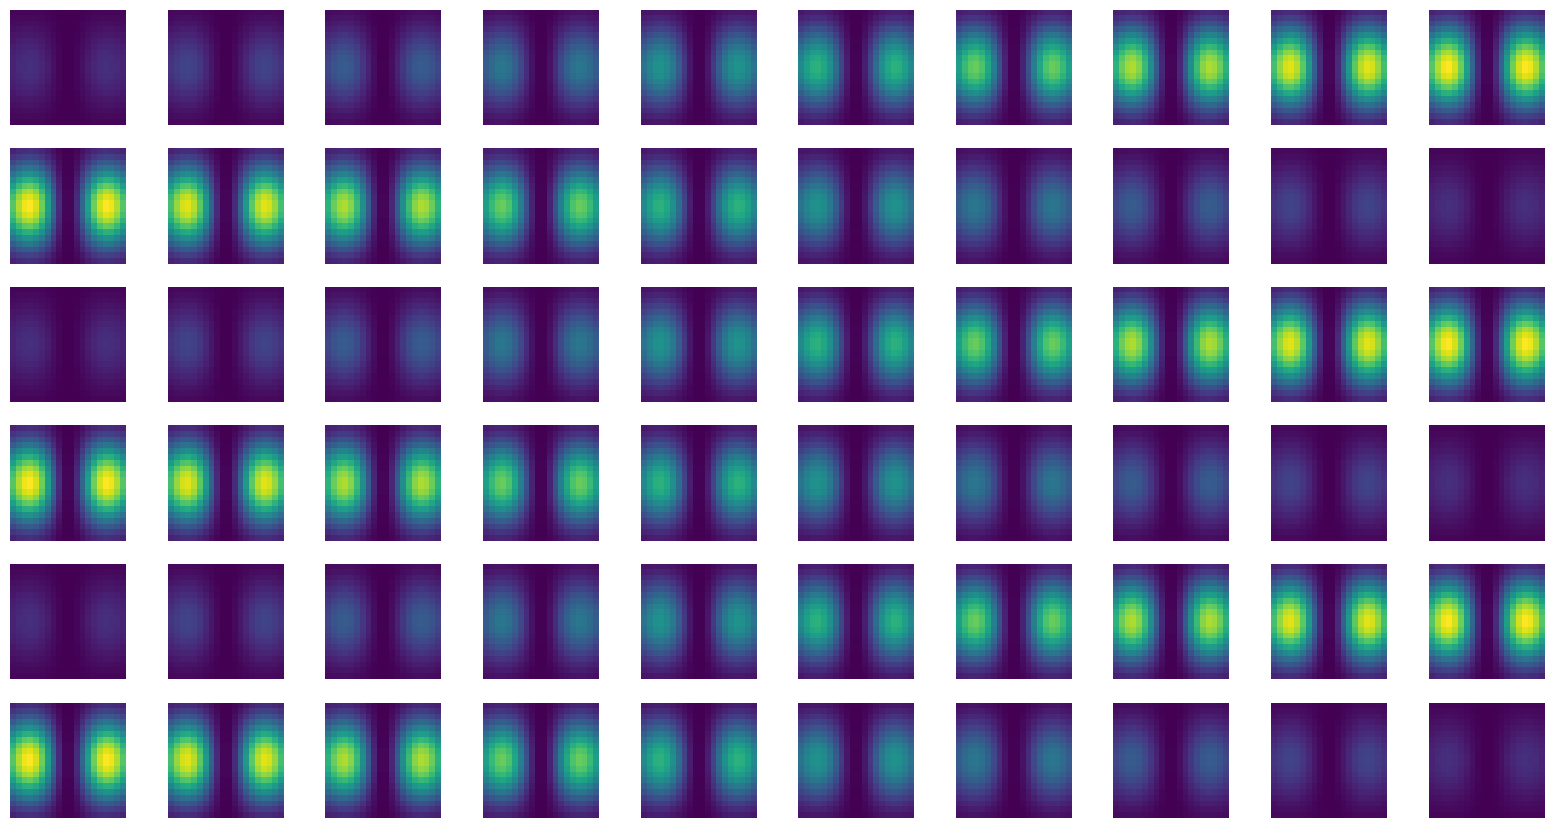

In [17]:
fig,axs=plt.subplots(6,10,figsize=(20,10.5))
axs=axs.flatten()
print(len(axs))
vals=tool.func1_3D(coes1)
vmin,vmax=np.min(vals),np.max(vals)
for i in range(20):
    axs[i].matshow(vals[:,:,i],vmin=vmin,vmax=vmax)
    axs[i].axis('off')

vals=tool.func2_3D(coes2)
vmin,vmax=np.min(vals),np.max(vals)
for i in range(20):
    axs[i+20].matshow(vals[:,:,i],vmin=vmin,vmax=vmax)
    axs[i+20].axis('off')

vals=np.zeros_like(vals)
for i in range(6):
    coes=np.zeros(6)
    coes[i]=coes2[i]
    coes=np.linalg.inv(tool.M)@coes
    vals+=tool.func1_3D(coes)
for i in range(20):
    axs[i+40].matshow(vals[:,:,i],vmin=vmin,vmax=vmax)
    axs[i+40].axis('off')

